In [1]:
#Clustering using k_Means
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
%matplotlib inline


In [2]:
#Importamos los datos
URL_DATA = "https://raw.githubusercontent.com/hoat23/DataAnalytics/master/data/CaracteristicasDeVinos.csv"
data = pd.read_csv(URL_DATA)
data.head()

,Vino,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,2,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,3,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,4,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,5,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Vino             178 non-null    int64  
 1   Alcohol          178 non-null    float64
 2   Malic            178 non-null    float64
 3   Ash              178 non-null    float64
 4   Alcalinity       178 non-null    float64
 5   Magnesium        178 non-null    int64  
 6   Phenols          178 non-null    float64
 7   Flavanoids       178 non-null    float64
 8   Nonflavanoids    178 non-null    float64
 9   Proanthocyanins  178 non-null    float64
 10  Color            178 non-null    float64
 11  Hue              178 non-null    float64
 12  Dilution         178 non-null    float64
 13  Proline          178 non-null    int64  
dtypes: float64(11), int64(3)
memory usage: 19.6 KB


In [5]:
data = data.drop(['Vino'], axis = 1)

In [31]:
data.describe()

,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258
std,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474
min,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000
50%,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000
75%,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000
max,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000


In [33]:
data_normalizada = (data - data.min())/(data.max() - data.min())
data_normalizada.describe()

,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,0.518584,0.315484,0.538244,0.458502,0.323278,0.453487,0.356386,0.437460,0.372523,0.322363,0.388170,0.491460,0.334446
std,0.213639,0.220780,0.146708,0.172142,0.155244,0.215811,0.210730,0.234818,0.180555,0.197806,0.185831,0.260070,0.224613
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.350658,0.170455,0.454545,0.340206,0.195652,0.262931,0.182489,0.264151,0.264984,0.165529,0.245935,0.244505,0.158702
50%,0.531579,0.222332,0.534759,0.458763,0.304348,0.474138,0.378692,0.396226,0.361199,0.290956,0.394309,0.553114,0.282097
75%,0.696711,0.462945,0.640374,0.561856,0.402174,0.627586,0.534810,0.580189,0.485804,0.419795,0.520325,0.695971,0.504280
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


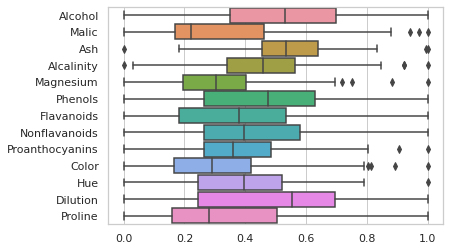

In [34]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(style="ticks")
sns.set_theme(style="whitegrid")
#df = pd_img[ft]
ax = sns.boxplot(data=data_normalizada,width=0.9,orient="h")
#ax = sns.swarmplot(data=data_normalizada, color=".25")

In [38]:
# Searhing number optimal of clusters
wcss = []
for i in range(1, 11):
  kmeans = KMeans(n_clusters=i, max_iter=300)
  kmeans.fit(data_normalizada)
  print(kmeans.inertia_)
  wcss.append(kmeans.inertia_)

95.5995377847106
64.5376670238943
48.95403581962662
44.769330540824775
42.368802516268445
40.09959546376572
38.157905291789675
36.32590190359447
34.49024322931088
33.409737291953654


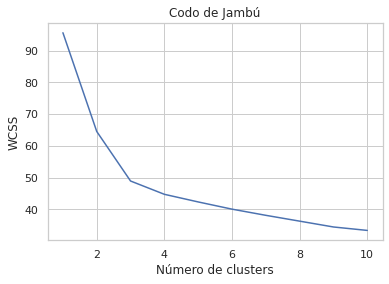

In [39]:
# Plotting
plt.plot(range(1,11), wcss)
plt.title("Codo de Jambú")
plt.xlabel('Número de clusters')
plt.ylabel("WCSS")
plt.show()

In [40]:
# Aplying K-means to database
clustering = KMeans(n_clusters=3, max_iter=300) # Creating the model
clustering.fit(data_normalizada) # Aplying the model to database

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [41]:
#Adding the classification to the original file
data['KMeans_Cluster'] = clustering.labels_
data.head()

,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline,KMeans_Cluster
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065,2
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050,2
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185,2
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480,2
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735,2


In [70]:
# Aplying PCA to visualize the clusters in 2D plot
from sklearn .decomposition import PCA
def reduction_pca(data,columns = ['Component_01','Component_02']):
  pca = PCA(n_components = len(columns))
  data_pca = pca.fit_transform(data_normalizada)
  df_pca = pd.DataFrame(data=data_pca, columns = columns)
  return df_pca

df_temp = reduction_pca(data_normalizada, columns = ['Component_01','Component_02'])
df_temp = pd.concat( [df_pca, data['KMeans_Cluster']], axis=1 )
df_temp.head()

,Component_01,Component_02,KMeans_Cluster
0,-0.706336,-0.253193,2
1,-0.484977,-0.008823,2
2,-0.521172,-0.189187,2
3,-0.821644,-0.580906,2
4,-0.202546,-0.059467,2


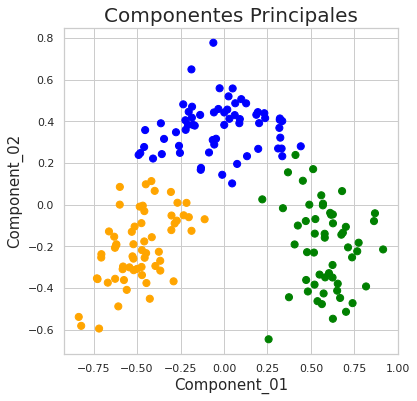

In [69]:
# Ploting
def ploting_clusters(data, columns=["Component_01","Component_02"]):
  fig = plt.figure(figsize=(6,6))
  ax = fig.add_subplot(1,1,1)
  ax.set_xlabel(columns[0], fontsize=15)
  ax.set_ylabel(columns[1], fontsize=15)
  ax.set_title('Componentes Principales', fontsize=20)

  color_theme = np.array(['blue', 'green', 'orange'])
  ax.scatter( x = df_temp.Component_01, y = df_temp.Component_02, c = color_theme[df_temp.KMeans_Cluster], s=50)
  plt.show()

ploting_clusters(df_temp)